# Debug RMSE Part 2

In [1]:
# imports
import os
import numpy as np

import seaborn as sns
import h5py

from ulmo import io as ulmo_io
from ulmo.plotting import plotting
from ulmo.mae import cutout_analysis

# Load up

In [2]:
recon_file35 = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Recon', 'mae_reconstruct_t35_p30.h5')
recon_file75 = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Recon', 'mae_reconstruct_t75_p30.h5')

In [3]:
f_35 = h5py.File(recon_file35, 'r')
f_75 = h5py.File(recon_file75, 'r')

# Compare

In [4]:
i0_35 = f_35['valid'][0,0,...]
i0_75 = f_75['valid'][0,0,...]

In [5]:
i0_35.shape

(64, 64)

## Diff me

In [6]:
diff = i0_35- i0_75

<Axes: >

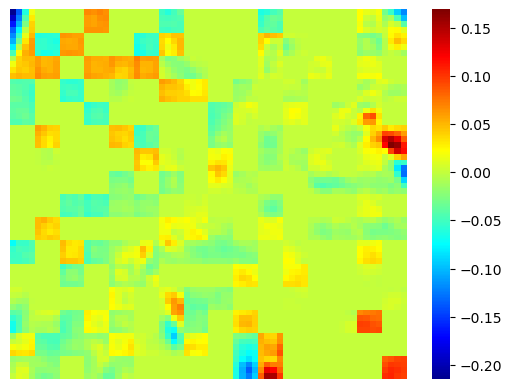

In [7]:
plotting.show_image(diff)

# RMSE

## Load the rest

In [8]:
mask_file35 = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Recon', 'mae_mask_t35_p30.h5')
mask_file75 = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Recon', 'mae_mask_t75_p30.h5')

In [9]:
f_mask_35 = h5py.File(mask_file35, 'r')
f_mask_75 = h5py.File(mask_file75, 'r')

In [10]:
mask_0_35 = f_mask_35['valid'][0,0,...]
mask_0_75 = f_mask_75['valid'][0,0,...]

In [11]:
orig_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'PreProc', 'MAE_LLC_valid_nonoise_preproc.h5')
f_orig = h5py.File(orig_file, 'r')

In [12]:
orig_0 = f_orig['valid'][0,0,...]

## Single

In [13]:
irms_35 = cutout_analysis.rms_single_img(orig_0, i0_35, mask_0_35)
irms_75 = cutout_analysis.rms_single_img(orig_0, i0_75, mask_0_75)
irms_35, irms_75

(0.03309219268494642, 0.036424134817382194)

## Table

In [19]:
valid_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Tables', 'MAE_LLC_valid_nonoise.parquet')
tbl = ulmo_io.load_main_table(valid_file)

Read main table: /home/xavier/Projects/Oceanography/OGCM/LLC/Enki/Tables/MAE_LLC_valid_nonoise.parquet


In [20]:
idx = np.where(tbl.pp_idx == 0)[0]
idx

array([118547])

In [21]:
tbl.iloc[idx[0]]

lat                                                         50.477859
lon                                                         146.46875
row                                                             10931
col                                                              8822
datetime                                          2011-11-30 00:00:00
filename            /data/Projects/Oceanography/data/LLC/ThetaUVSa...
pp_file                 s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5
pp_root                                               llc_144_nonoise
field_size                                                         64
pp_idx                                                              0
pp_type                                                             0
mean_temperature                                             1.481344
Tmin                                                            0.631
Tmax                                                            2.414
T90                 

## Histogram

(-0.05, 0.05)

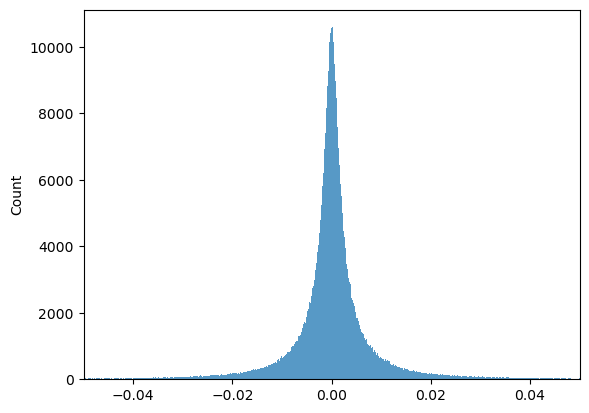

In [32]:
ax = sns.histplot(tbl.RMS_t35_p30-tbl.RMS_t75_p30)#, log_scale=(True,False))
ax.set_xlim(-0.05, 0.05)

# Complex

In [33]:
cmplx = tbl.LL < -150.

In [25]:
cmplx_tbl = tbl[cmplx].copy()

(-0.05, 0.05)

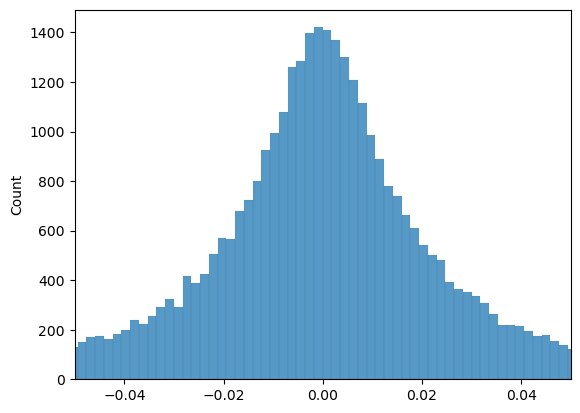

In [34]:
ax = sns.histplot(cmplx_tbl.RMS_t35_p30-cmplx_tbl.RMS_t75_p30)
ax.set_xlim(-0.05, 0.05)

In [29]:
np.nanmean(cmplx_tbl.RMS_t35_p30),  np.nanmean(cmplx_tbl.RMS_t75_p30) 

(0.10350745701035338, 0.10356417610461413)

In [31]:
np.nanmedian(cmplx_tbl.RMS_t35_p30),  np.nanmedian(cmplx_tbl.RMS_t75_p30) 

(0.08553365245461464, 0.08545922860503197)